[Reference](https://towardsdatascience.com/text-network-analysis-generate-beautiful-network-visualisations-a373dbe183ca)

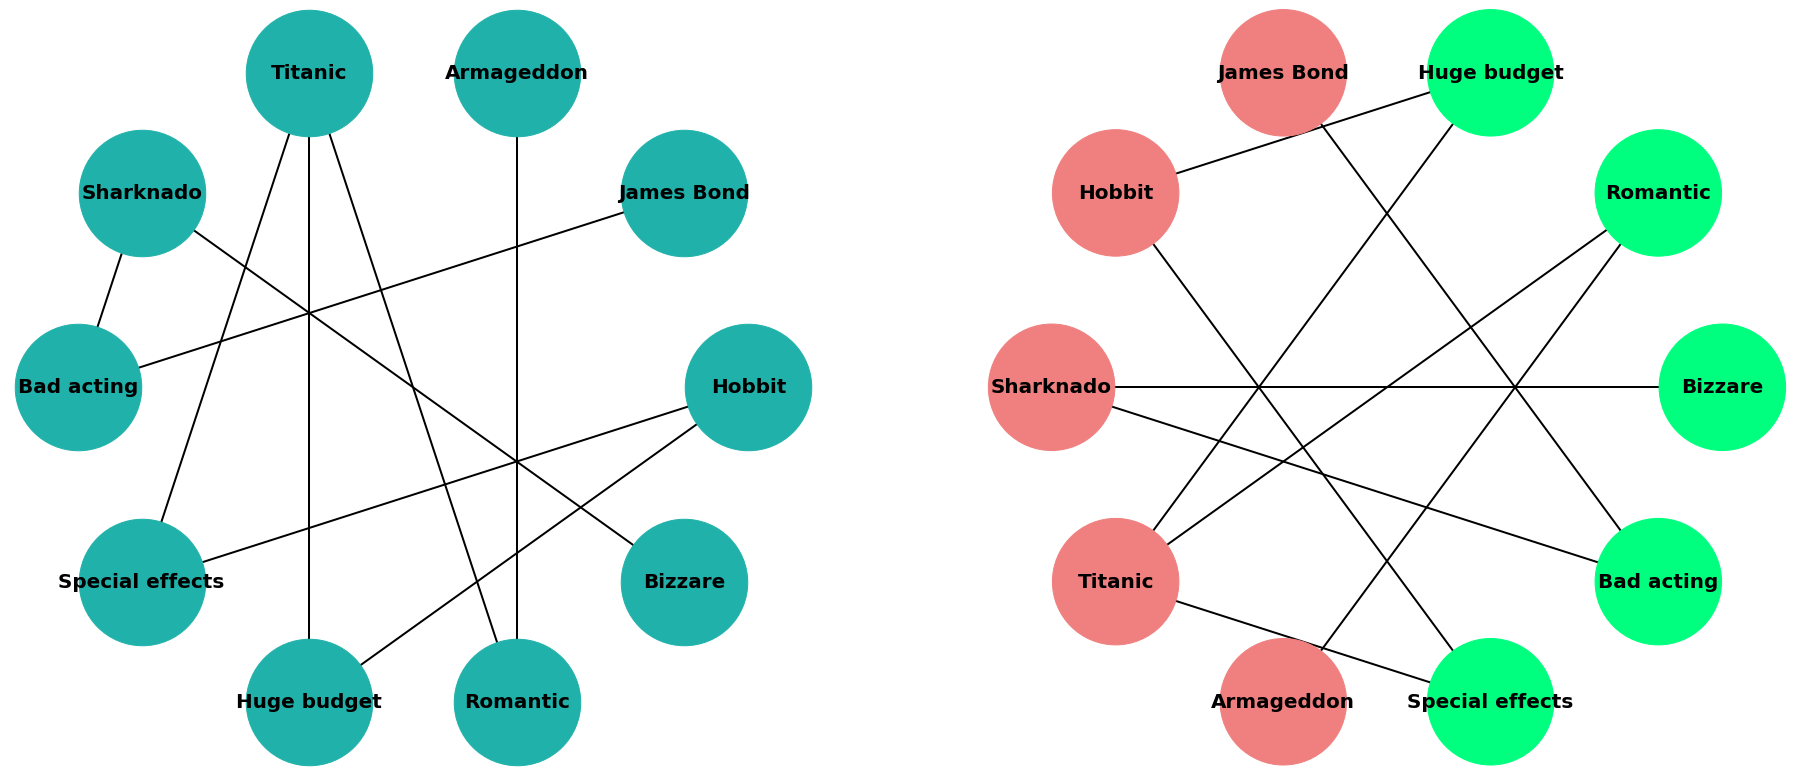

In [1]:
# Figure 3. Sorted vs. unsorted nodes in network plot

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(32,14))
ax1.set_title('Unsorted nodes',fontsize=30,fontweight='bold',fontname="Calibri",pad=50)
ax2.set_title('Sorted nodes',fontsize=30,fontweight='bold',fontname="Calibri",pad=50)

G = nx.Graph()
G.add_nodes_from(['Hobbit', 'James Bond', 'Armageddon', 'Titanic','Sharknado','Bad acting',
                  'Special effects','Huge budget','Romantic','Bizzare'])


G.add_edges_from([('Hobbit', 'Special effects'), ('Titanic', 'Special effects'),
                  ('Sharknado', 'Bizzare'), ('Titanic', 'Romantic'),
                  ('Titanic', 'Huge budget'),
                  ('Bad acting', 'James Bond'),
                  ('Armageddon', 'Romantic'),
                  ('Bad acting', 'Sharknado'),
                  ('Hobbit', 'Huge budget')
                  ])

H = nx.Graph()
H.add_nodes_from(['Bizzare', 'Romantic', 'Huge budget','James Bond', 'Hobbit','Sharknado',
                  'Titanic','Armageddon','Special effects','Bad acting'])


attributes = pd.DataFrame(
    [['Hobbit', 'lightcoral'],
     ['James Bond', 'lightcoral'],
     ['Armageddon', 'lightcoral'],
     ['Titanic', 'lightcoral'],
     ['Sharknado', 'lightcoral'],
     ['Bad acting', 'springgreen'],
     ['Special effects', 'springgreen'],
     ['Huge budget', 'springgreen'],
     ['Romantic', 'springgreen'],
     ['Bizzare', 'springgreen']],
    columns=['id', 'color']
)


node_attr = attributes.set_index('id').to_dict('index')
nx.set_node_attributes(H, node_attr)

colors = [u[1] for u in H.nodes(data="color")]

H.add_edges_from([('Hobbit', 'Special effects'), ('Titanic', 'Special effects'),
                  ('Sharknado', 'Bizzare'), ('Titanic', 'Romantic'),
                  ('Titanic', 'Huge budget'),
                  ('Bad acting', 'James Bond'),
                  ('Armageddon', 'Romantic'),
                  ('Bad acting', 'Sharknado'),
                  ('Hobbit', 'Huge budget')
                  ])


pos1 = nx.circular_layout(G)
pos = nx.circular_layout(H)


plt.subplot(1, 2, 1)
ax1=nx.draw_networkx(G, pos=pos1,node_color='lightseagreen',node_size=16000,font_size=20,font_weight='bold',width=2)

plt.box(False)
plt.subplot(1, 2, 2)
ax2=nx.draw_networkx(H, pos=pos,node_color=colors,node_size=16000,font_size=20,font_weight='bold',width=2)

plt.box(False) #remove box

plt.savefig('network_tip_five.png',dpi=500, bbox_inches='tight')
plt.show()

In [3]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/PetrKorab/Text-Network-Analysis-Generate-Beautiful-Network-Visualisations/main/data_text_network_viz.csv')
attributes = pd.read_csv('https://raw.githubusercontent.com/PetrKorab/Text-Network-Analysis-Generate-Beautiful-Network-Visualisations/main/attributes.csv')

In [4]:
attributes

,node,studio
0,captain america,Marvel Studios
1,thor,Marvel Studios
2,avengers,Marvel Studios
3,black panther,Marvel Studios
4,star wars,Lucasfilm Ltd.
5,indiana jones,Lucasfilm Ltd.
6,willow,Lucasfilm Ltd.
7,labyrinth,Lucasfilm Ltd.
8,madagascar,DreamWorks
9,shrek,DreamWorks


In [5]:
# Hive plot
import networkx as nx

G = nx.from_pandas_edgelist(data, source='node1', target='node2',edge_attr='co_occurence')
node_attr = attributes.set_index('node').to_dict('index')
nx.set_node_attributes(G, node_attr)

In [7]:
pip install nxviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 6.6 MB/s 
     |████████████████████████████████| 965 kB 43.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


/usr/local/lib/python3.7/dist-packages/nxviz/__init__.py:29: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  """


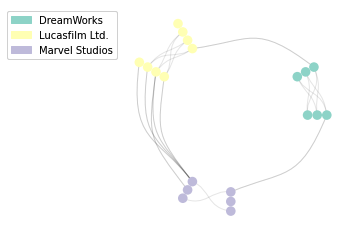

In [8]:
import nxviz as nv
from nxviz import annotate

nv.hive(G, group_by="studio", sort_by='studio',node_color_by="studio")
annotate.node_colormapping(G, color_by="studio")

plt.savefig('hive_plot.png',dpi=500, bbox_inches='tight')
plt.show()